# Klassifitseerimine

Klassifitseerimine tähendab objekti liigi ennustamist vastavalt klassifikaatorile st arvutuslikule mudelile, mis väljastab kas objekti liigi või tõenäosusliku ennustuse. Klassifikaatorid treenitakse objektide peal, mille klass on teada, kasutades klassifikaatori tüübile sobivaid treeningmeetodeid.

Sisukord:
* [Andmestik Iris](#Iris)
* [Ülesanne 4.1](#4_1)
* [Klassifitseerimismeetodeid: pertseptronid, lineaarne regressioon ja otsustuspuud](#Meetodeid)
* [Ülesanne 4.2](#4_2)


# Andmestik *Iris*

See sissejuhatav näide, mis annab lühiülevaate klassifitseerimisprotsessist, põhineb S.Raschka raamatu Python Machine Learning peatükil 3.


Mooduli *sklearn* alammoodul ```datasets``` sisaldab mitmeid näiteandmestike, mida on võimalik vastava ```load_<nimi>()``` funkstiooniga laadida. Tavaliselt laeme me oma andmestikke csv failidest, aga selles näites me seda funktsionaalsust ei vaatle. *Iris* andmestik sisaldab erinevate iiriste (lill) mõõtmistulemusi.

In [1555]:
from sklearn import datasets

iris = datasets.load_iris()

Vaatame andmestiku kirjeldust (DESCR). 


In [1556]:
print("\n",iris.DESCR)


 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== =========

Vaatame toorandmete maatriksit (data).

In [1557]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Vaatame klasside vektorit ja klasside 0, 1, 2 nimesid, vektori iga element vastab maatriksi reale.

In [1558]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1559]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Omistame andmemaatriksi muutujale *X* ja klassivektori muutujale *y*.

In [1630]:
X = iris.data
y = iris.target

Kuna me tahame kontrollida, kuidas meie ennustav mudel töötab uute andmetega, siis on õige jagada andmestik treening- (*X_train, y_train*) ja testandmeteks (*X_test, y_test*). Selle jaoks kasutame mooduli [model_selection](https://scikit-learn.org/stable/model_selection.html#model-selection) funktsiooni [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split). Funktsiooni parameetreid määravad testandmete proportsiooni koguandmetest (30%) ja juhuarvude generaatori sisendmuutuja. 

In [1631]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Treeningklassid:", y_train)
print("\nTestklassid:", y_test)

Treeningklassid: [1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]

Testklassid: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


Paljud masinõppe algoritmid vajavad optimaalseks tööks omaduste(atribuutide) väärtuste skaleerimist/normaliseerimist. Siin kasutame selleks eeltöötluseks  [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)  mooduli klassi [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) (keskväärtus 0, ühikdispersioon). Seostame selle ```fit()``` meetodi abil ```X_train``` andmestikuga ja omistame transformeeritud ```X_train``` ja ```X_test``` andmestikud muutujatele ```X_train_std, X_test_std```.

In [1562]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_test_std)

[[-0.10694994 -0.55721505  0.70793846  1.51006688]
 [ 0.1222285  -1.92315077  0.09545238 -0.29318114]
 [-0.45071761  2.6299683  -1.35224199 -1.32360858]
 [ 1.6118884  -0.32955909  1.37610509  0.7372463 ]
 [-1.02366372  0.80872067 -1.29656144 -1.32360858]
 [ 0.46599617  0.58106472  1.20906343  1.63887031]
 [-1.02366372  1.03637663 -1.40792255 -1.19480515]
 [ 0.92435306  0.12575281  0.48521625  0.35083601]
 [ 1.03894229 -0.55721505  0.5408968   0.22203258]
 [ 0.23681773 -0.55721505  0.09545238  0.09322915]
 [ 0.23681773 -1.01252695  0.98634122  0.22203258]
 [ 0.5805854   0.35340877  0.37385514  0.35083601]
 [ 0.23681773 -0.55721505  0.48521625 -0.03557428]
 [ 0.69517462 -0.55721505  0.42953569  0.35083601]
 [ 0.23681773 -0.32955909  0.48521625  0.22203258]
 [-1.13825295  1.26403258 -1.35224199 -1.45241201]
 [ 0.1222285  -0.32955909  0.37385514  0.35083601]
 [-0.45071761 -1.01252695  0.31817459 -0.03557428]
 [-1.25284217 -0.10190314 -1.35224199 -1.19480515]
 [-0.56530683  1.94700044 -1.40

<a id=#Pred></a>
Järgmiseks tekitame klassifitseeriva (ennustava) mudeli. Siin kasutame selleks pertseptronit (lihtne tehisnärvivõrk, klass __[Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)__). See osa tuleb mõne muu mudeli testimiseks, mida on [scikit-learn klassifitseerimise teemas](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) palju, üle kirjutada.

In [1563]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# predictive_model = Perceptron(max_iter=40, tol=0.001, eta0=0.1, random_state=0)
# predictive_model = LogisticRegression(solver='lbfgs') # actually a classification, not regression
# predictive_model = DecisionTreeClassifier()
# predictive_model = sklearn.svm.SVC()
predictive_model = sklearn.neighbors.KNeighborsClassifier()

Treenime ennustava mudeli meetodi ```fit()``` abil kasutades treeningandmeid (andmemaatriks, oodatavate klasside vektor).

In [1564]:
predictive_model.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Leiame ennustused ```y_pred``` testandmete tarbeks kasutades meetodit ```predict()```.


In [1565]:
y_pred = predictive_model.predict(X_test_std)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


Võrdleme ennustusi olemasolevate andmetega. Kasutame 
__[numpy massiivide](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)__  võrdlusoperaatorit !=, mis tagastab 0-1 vektori (kõik positsioonid, kus y_test väärtus ei võrdu y_pred väärtusega on 1, muu 0), mille me siis kokku summeerime.

In [1566]:
print("Kokku:", len(y_test))
print("Valesti klassifitseeritud:", (y_test != y_pred).sum())

Kokku: 45
Valesti klassifitseeritud: 1


Võime kasutada ka funktsiooni __[accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)__, mis arvutab ennustustäpsuse.

In [1567]:
from sklearn.metrics import accuracy_score
print("Täpsus:", accuracy_score(y_test, y_pred))

Täpsus: 0.9777777777777777


Kuva treening- ja testandmed. Koodi detaile me siin lähemalt ei vaatle.

In [1568]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', '*', '^', 'v', 'd')
    colors = ('yellow', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    
    # highlight errors
    Z = classifier.predict(X)
    E = (Z != y)
    plt.scatter(X[E, 0],
                X[E, 1],
                c='',
                alpha=1.0,
                edgecolor='red',
                linewidths=2,
                marker='d',
                s=55, label='error')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


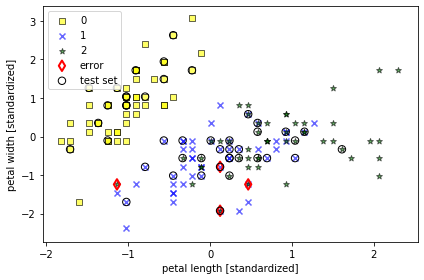

In [1569]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=predictive_model, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

<a id='4_1'></a>
## Ülesanne 4.1

a) Muutke lahtris, kus toimub [klassifikaatori initsialiseerimine](#Pred) ära kasutatav klassifikaator, proovides läbi järgmised: 
* [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)
* [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
* [DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
* [Support Vector Classification (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

Millise meetodi puhul on täpsus (väga lihtsustatud mõõt, aga siin sobib) suurim?


b) Laadige alla eelmises ülesandes vaadeldud [loomaaia andmestik](https://archive.ics.uci.edu/ml/datasets/zoo). Võtke veerg `aquatic` ennustatavaks klassiks Y. Looge andmetabel *X*, millest on eemaldatud klassile vastav veerg `aquatic` ja mittearvulised veerud `animal_name`ja `type`.

Jagage andmed, nagu iiriste näites, treening- ja testandmeteks. Treenige a) osas mainitud  klassifikaatoreid ja leidke neist täpseim.

In [1570]:
Täpsus: 0.9555555555555556
Täpsus: 0.9111111111111111
Täpsus: 0.9777777777777777
Täpsus: 0.9777777777777777
Täpsus: 0.9777777777777777

In [1650]:
import pandas as pd

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

zoo_df = pd.read_csv("Zoo.data", index_col=0, names=["hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail" ,"domestic", "catsize", "type"])

y = zoo_df.aquatic
print(Y)
X = zoo_df.drop(["aquatic", "type"], axis=1)
X_z.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#X_train_std = sc.fit_transform(X_train)
#X_test_std = sc.fit_transform(X_test)
print(X_test_std)

aardvark    0
antelope    0
bass        1
bear        0
boar        0
           ..
wallaby     0
wasp        0
wolf        0
worm        0
wren        0
Name: aquatic, Length: 101, dtype: int64
[[-0.91766294 -0.5         0.8660254  -0.8660254  -0.56635211  0.91766294
   0.8660254   0.5         0.43178777  4.0620192  -0.38411064  0.49204886
  -1.58113883 -0.43178777 -0.91766294]
 [-0.91766294 -0.5         0.8660254  -0.8660254  -0.56635211  0.91766294
   0.8660254   0.5        -2.31595258  4.0620192   2.60341656 -1.56427472
   0.63245553 -0.43178777  1.08972474]
 [-0.91766294 -0.5         0.8660254  -0.8660254  -0.56635211  0.91766294
   0.8660254   0.5        -2.31595258 -0.24618298  2.60341656 -1.56427472
   0.63245553 -0.43178777 -0.91766294]
 [ 1.08972474 -0.5        -1.15470054  1.15470054 -0.56635211 -1.08972474
   0.8660254   0.5         0.43178777 -0.24618298 -0.38411064  0.49204886
   0.63245553 -0.43178777  1.08972474]
 [ 1.08972474 -0.5        -1.15470054  1.15470054 -0.5663

In [1574]:
predictive_model = Perceptron(max_iter=70, eta0=0.1, random_state=0)
predictive_model.fit(X_train_std, y_train)
y_pred = predictive_model.predict(X_test_std)

print("Kokku:", len(y_test))
print("Valesti klassifitseeritud:", (y_test != y_pred).sum())
print("Täpsus:", accuracy_score(y_test, y_pred))

Kokku: 31
Valesti klassifitseeritud: 3
Täpsus: 0.9032258064516129


In [1575]:
predictive_model = LogisticRegression() # actually a classification, not regression

predictive_model.fit(X_train_std, y_train)
y_pred = predictive_model.predict(X_test_std)

print("Kokku:", len(y_test))
print("Valesti klassifitseeritud:", (y_test != y_pred).sum())
print("Täpsus:", accuracy_score(y_test, y_pred))

Kokku: 31
Valesti klassifitseeritud: 5
Täpsus: 0.8387096774193549


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1576]:
predictive_model = DecisionTreeClassifier()
predictive_model.fit(X_train_std, y_train)
y_pred = predictive_model.predict(X_test_std)

print("Kokku:", len(y_test))
print("Valesti klassifitseeritud:", (y_test != y_pred).sum())
print("Täpsus:", accuracy_score(y_test, y_pred))

Kokku: 31
Valesti klassifitseeritud: 5
Täpsus: 0.8387096774193549


In [1577]:
predictive_model = SVC()
predictive_model.fit(X_train_std, y_train)
y_pred = predictive_model.predict(X_test_std)

print("Kokku:", len(y_test))
print("Valesti klassifitseeritud:", (y_test != y_pred).sum())
print("Täpsus:", accuracy_score(y_test, y_pred))

Kokku: 31
Valesti klassifitseeritud: 6
Täpsus: 0.8064516129032258


In [1578]:
predictive_model = KNeighborsClassifier()
predictive_model.fit(X_train_std, y_train)
y_pred = predictive_model.predict(X_test_std)

print("Kokku:", len(y_test))
print("Valesti klassifitseeritud:", (y_test != y_pred).sum())
print("Täpsus:", accuracy_score(y_test, y_pred))

Kokku: 31
Valesti klassifitseeritud: 5
Täpsus: 0.8387096774193549


<a id=#Meetodeid></a>
# Klassifitseerimismeetodeid: pertseptronid, lineaarne regressioon ja otsustuspuud


Siin anname ülevaate mõningate klassifitseerimismeetodite teooriast. Kuigi scikit-learn võimaldab neid kasutada "musta kastina" on teooria ja vastava matemaatika ning algoritmide  tundmine tihti kasulik ja vajalik. Põhjalikum seletus kursuse põhiõpikust inglise keeles on siin: [Single-Layer Neural Networks and Gradient Descent](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).


## Pertseptron


<img src="https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_neuron.png">

*Joonis 1. Neuron. S. Raschka, Python Machine Learning.* https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

<img src="https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_schematic.png">

*Joonis 2. Pertseptroni skeem. S.Raschka, Python Machine Learning.*

Summaarne sisend on arvutatud neuroni sisendväärtuste __x__ ja kaaluvektori **w** elementhaaval korrutise summana (vaadates vektoreid maatriksitena, saame selleks kasutada maatrikskorrutist):
$z = w_1 x_1 + ... w_m x_ m$

$w = \begin{bmatrix}
w_1  \\
...  \\
w_m   
\end{bmatrix},  
x = \begin{bmatrix}
x_1  \\
...  \\
x_m   
\end{bmatrix}$

Sisendväärtused vastavad närvivõrgu analoogias välisele stiimulile, kaalud neuroni dendriitide konfiguratsioonile ja summa on sisend aksonile, mis aktiveerub vastavalt aktivisatsioonifunktsioonile. 

In [1618]:
# Tekitame juhuslikud pertseptroni kaalud w 4 sisendi jaoks
w = np.random.rand(4)
#w = np.ones(4)
print(w)

[0.21287437 0.44005424 0.52055126 0.4054174 ]


In [1632]:
# Rakendame neid esimesele objektile iiriste andmestikust
print(X[0])
z = w @ X[0].T
print(z)

[5.1 3.5 1.4 0.2]
3.435704390722821


Aktivisatsioonifunktsiooniks $\phi(z)$ kasutame siin lihtsat Heaviside (läve) funktsiooni, kus läveks on $\theta$:

$\phi(z) = \begin{cases}
1 & \text{kui $z \geq \theta$ } \\
0 & \text{muul juhul}
\end{cases}$

In [1633]:
# Näiteks nii (theta=0)
y_pred = int(z>=0)
y_pred

1

Juhuslikud kaalud annavad loomulikult juhuslikke tulemusi. Juhitud  (supervised) õppimise käigus muudame me klassifikaatorit näiteobjektide põhjal. Antud juhul korrigeerime me kaale. Selleks on erinevaid meetodeid (geneetilised, evolutsioonilised, gradient descent), aga siin vaatame me vast kõige triviaalsemat võimalust, kus iga kaalu $w_j$ muudetakse $\Delta w_j$ võrra:

$w_j := w_j + \Delta w_j$

Korrektsioon $\Delta w_j$ leitakse triviaalselt:

$\Delta w_j = \eta (y-\hat{y}) x_j$

$\eta$: õppimiskiiruse konstant 0...1 vahel, $y$: tegelik väärtus, $\hat{y}$: ennustatud väärtus ehk $\phi(z)$.

In [1634]:
# Näiteks esimese objekti ja klassi versicolor jaoks
y_versi = (y==1).astype(int)
eta = 0.02 # õppimiskiirus
delta_w = eta * (y_versi[0]-y_pred) * X[0] # NB! X[0] on reavektor, opereerime kõigi kaaludega korraga
print(delta_w)
w += delta_w
print(w)

[-0.102 -0.07  -0.028 -0.004]
[0.11087437 0.37005424 0.49255126 0.4014174 ]


In [1635]:
# Kontrollime ennustustäpsust
y_preds = [int((w @ x.T)>=0) for x in X[:100]]
print(y_preds)
print("Täpsus:", sum(y_preds==y_versi[:100]) / len(y_preds))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Täpsus: 0.5


In [1636]:
# Tegelikult toimub õppimine loomulikult tsüklis
for x_i, y_i in zip(X[:100], y_versi[:100]):
    z = w @ x_i.T
    y_pred = int(z>=0)
    delta_w = eta * (y_i - y_pred) * x_i
    w += delta_w
print(w)

[-0.27512563  0.11405424  0.38055126  0.3854174 ]


In [1640]:
# Ja testime oma tulemust (treening- ja testandmed on meil samad, mis poe üldiselt hea)
y_preds = [int((w @ x.T)>=0) for x in X[:100]]
print(y_preds)
print("Täpsus:", sum(y_preds==y_versi[:100]) / len(y_preds))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Täpsus: 1.0


## Logistiline regressioon



<a id=#sigmoid></a>

Logistiline regressioon ([scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html)) põhineb rafineeritumal aktivisatsioonifunktsioonil ja õppimisreeglil kui eelpool vaadeldud triviaalne pertseptron. Siin ei ole väljundiks mitte nominaalne klass , vaid tõenäosus vahemikus 0..1 ja õppimine põhineb gradientlaskumisel: kui ennustus on vähem mööda, siis muudetakse kaale vähem, kui rohkem mööda, siis rohkem.

Summat  $z$ interpreteeritakse siin kui logaritmi sündmuse toimumise ja mittetoimumise tõenäosuste suhtest (tihti öeldakse näiteks, et šansid on kolm nelja vastu vms). Suhe tõenäosuse $p$ jaoks on $\frac{p}{1-p}$. Logaritm sellest on $logit(p) = \log \frac{p}{1-p}$, mille omakorda võtame (meelevaldselt) võrdseks 
$$logit(p) = \log \frac{p}{1-p} = z = w^T x$$. 

Avaldise  $\log \frac{p}{1-p}$ teisendab tõenäosuseks tagasi **sigmoidfunktsioon** $$\phi(z)=\frac{1}{1+e^{-z}}$$, mida kasutame aktivisatsioonifunktsioonina.

Vt ka [Logistic Regression: Why sigmoid function?](https://sebastianraschka.com/faq/docs/logistic-why-sigmoid.html)

<img src=https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_gradient_descent_1.png></img>

*Joonis 3. Gradientlaskumine. S.Raschka, Python Machine Learning.*

Treenimisel lähtume me gradientlaskumise meetodist, kus $\Delta \mathbf{w}$ leidmisel lähtume vähimruutude meetodi põhiselt defineeritud hinnafunktsioonist (summeerime hinna üle kõigi treeningobjektide indeksitega $i$).

$$J(\mathbf{w})=\sum_i{(\phi(z^{(i)}) - y^{(i)})^2}$$

Korrektsioon kaalule leitakse $J(w)$ tuletise/gradiendi abil $$\Delta w_j = -\eta \frac{\partial{J}}{\partial{w_j}} = \eta \sum_i{(y^{(i)} - \phi(z^{(i)})) x_j^{(i)}}$$

## Otsustuspuu




Otsustuspuud esitab visuaalselt mooduli `sklearn.tree` funktsioon `plot_tree()`, tekstina sama mooduli funktsioon `export_text()`.



<!--Kahjuks ei ole GraphViz TTÜ arvutitesse installeeritud. Õnneks võimaldavad veebiliidesed, nagu
https://dreampuf.github.io/GraphvizOnline/ dot faili teksti põhjal puud genereerida. Allolevas väljundlahtris leiduv tekst tuleb copy-paste abil veebiaknasse kopeerida, misjärel on võimalik genereeritud pilt salvestada.-->



IndexError: list index out of range

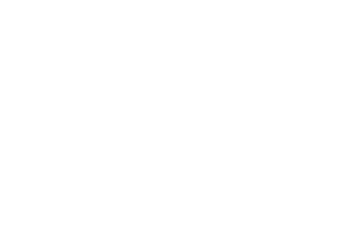

In [1655]:
import sklearn
from sklearn import tree

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_std, y_train)
# dot = sklearn.tree.export_graphviz(dt, out_file=None)
# print(dot)

sklearn.tree.plot_tree(dt, feature_names=iris.feature_names)

In [1652]:
print(sklearn.tree.export_text(dt, feature_names=iris.feature_names))

ValueError: feature_names must contain 15 elements, got 4

In [1644]:
import math
p = 0.8
z = math.log(p / (1 - p))
z = 1 / (1 + 2.71828 ** (-z))



<a id='4_2'></a>
## Ülesanne 4.2 

a.) Näidake, et asendades $z = \log \frac{p}{1-p}$ [sigmoidfunktsiooni](#sigmoid) $\phi(z)=\frac{1}{1+e^{-z}}$ saame väärtuseks tõenäosuse $p$. Pange tuletuskäik siia kirja, kasutades dollarisümbolite vahel LaTeX-i matemaatilist notatsiooni. Vt näiteks https://www.overleaf.com/learn/latex/Mathematical_expressions , ka tavaline Google otsing LaTeX+probleem annab tavaliselt tulemuseks mõistliku StackExchange vastuse.

b.) Genereerida ülesande 4.1.b loomaaia andmestiku põhjal otsustuspuu pilt. Millised puu lehed katavad suurt osa loomadest (*samples* on suur)? Millised reeglid st kombineeritud tingimused vastavad nendesse lehtedesse viivatele harudele?